In [ ]:
!pip install soynlp
!pip install konlpy
!pip install konlpy wordcloud
!pip install apyori

In [ ]:
# colab에서 한글 폰트 설정하기
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family = font_name)
fm._rebuild()

# 런타임 다시 시작, 2번 셀부터 다시 실행

In [ ]:
# 한글 폰트가 적용되었는지 확인해보기
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [ ]:
# 필요한 패키지 import

import pandas as pd
from soynlp.normalizer import *
import re
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Twitter
import soynlp
from wordcloud import WordCloud
import pickle
import datetime
from datetime import timedelta
import numpy as np
import networkx as nx

import warnings
warnings.filterwarnings('ignore')



kkma = Kkma()
okt = Okt()
twitter = Twitter()

In [ ]:
# 저장한 pickle파일을 다시 list형태로 불러오는 코드
# 카테고리 별 2천개의 인스타그램 게시글 search
# 2차원 리스트 형태, 1개의 리스트마다 하나의 게시물 안에 있는 해시태그를 모았음.
with open('/content/drive/MyDrive/dataset/insta_tag_list_10000.txt', 'rb') as lf:
    insta_tag_list = pickle.load(lf)
    print(insta_tag_list)

In [ ]:
# Apriori 연관성 분석으로 항목개수가 2개이고 지지도가 0.02~0.05 사이인 항목 집합을 추려 냄.

from apyori import apriori
result = (list(apriori(insta_tag_list, min_support=0.02)))
dataframe = pd.DataFrame(result)
dataframe['length'] = dataframe['items'].apply(lambda x:len(x))
dataframe = dataframe[(dataframe['length']==2) & (dataframe['support'] >= 0.02)].sort_values(by='support',ascending=False)

In [ ]:
# networkx 그래프 정의
G = nx.Graph()
ar = (dataframe['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize) / max(nsize) - min(nsize))

# 레이아웃
# pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G)
shl = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
spl = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

In [ ]:
plt.figure(figsize = (30,30))
plt.axis('off')

plt.subplot(339)
plt.title('kamada_kawai_layout', fontsize = 16)
nx.draw_networkx(G, font_family = font_name, font_size = 16,
                pos = kkl, node_color = list(pr.values()), node_size = nsize,
                alpha = 0.7, edge_color = '.5', cmap = plt.cm.YlGn)

plt.show()

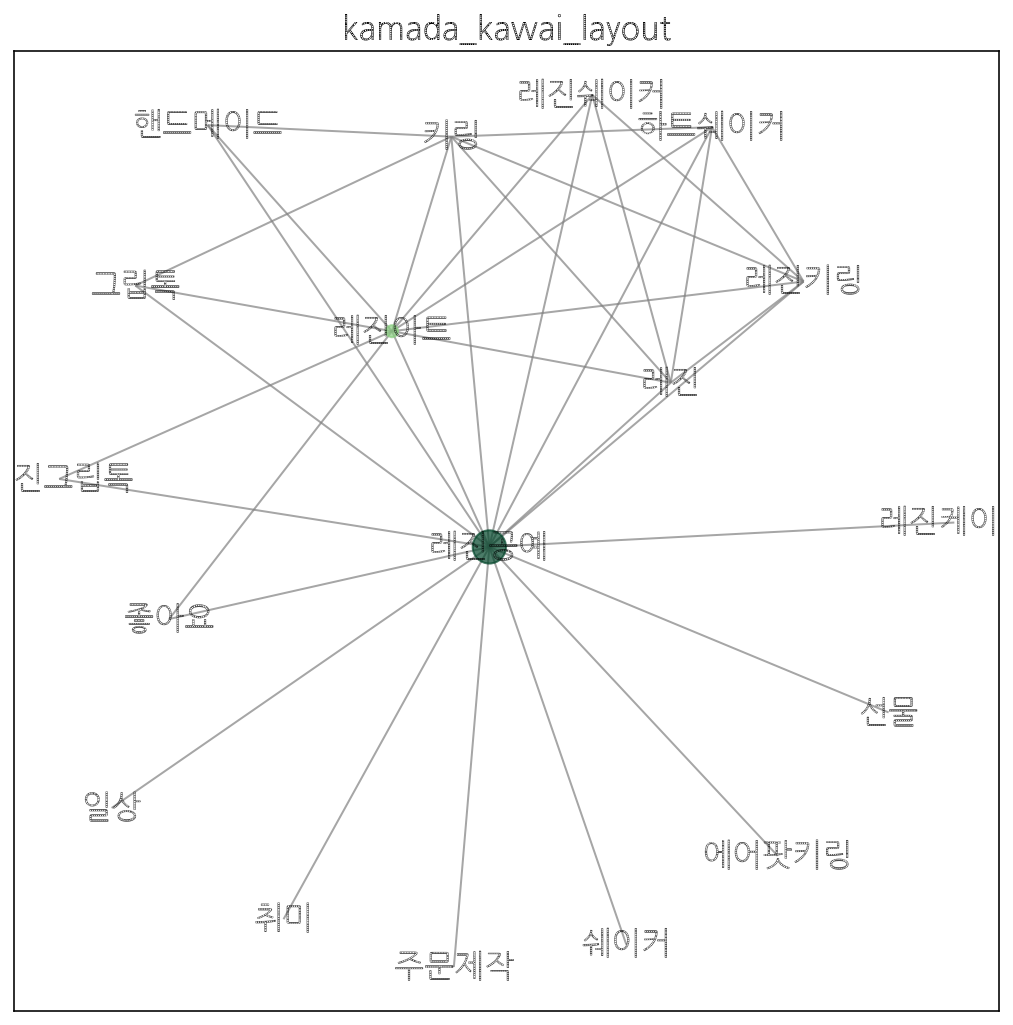